Import libraries

Import data

Data Dictionary
    * Column name  
    * Variable type  
        1. Numerical  
        2. Categorical
    * Data Type

Data Cleaning
    Null value Treatment
    Duplicate
    Wrong datatype

Info
Describe function

Outliers
    Boxplot

EDA
    15 Problem Statements

2 Algorithms

In [10]:
%pip install pandas
%pip install numpy
%pip install seaborn
%pip install scikit-learn
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('C:/Users/russel/Desktop/Assignments and Projects/CapStone Project Health Tracker/data/medical_records.csv')


In [7]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   patient_id             100000 non-null  int64 
 1   name                   100000 non-null  object
 2   date_of_birth          100000 non-null  object
 3   gender                 100000 non-null  object
 4   medical_conditions     100000 non-null  object
 5   medications            100000 non-null  object
 6   allergies              100000 non-null  object
 7   last_appointment_date  100000 non-null  object
dtypes: int64(1), object(7)
memory usage: 6.1+ MB


,patient_id
count,100000.000000
mean,50000.500000
std,28867.657797
min,1.000000
25%,25000.750000
50%,50000.500000
75%,75000.250000
max,100000.000000


### EDA 1
Count the number of males and females have been medicated

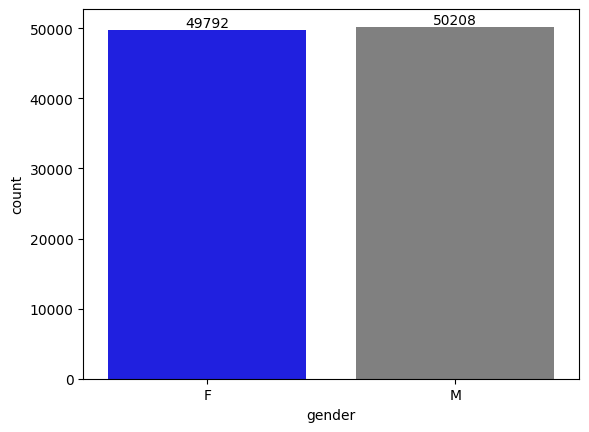

In [4]:
ax = sns.countplot(x = 'gender',data = df,hue = 'gender', palette=['blue', 'gray'])
for bars in ax.containers:
    ax.bar_label(bars)

### EDA 2
Count the number of patients by their Age

C:\Users\russel\AppData\Local\Temp\ipykernel_20008\1960864418.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date_of_birth'] = pd.to_datetime(df['date_of_birth'])


100      42
38     1009
35     1011
96      948
4      1045
       ... 
3      1055
29     1015
74      981
0      1075
101      22
Name: Count, Length: 102, dtype: int64


<Figure size 1000x1000 with 0 Axes>

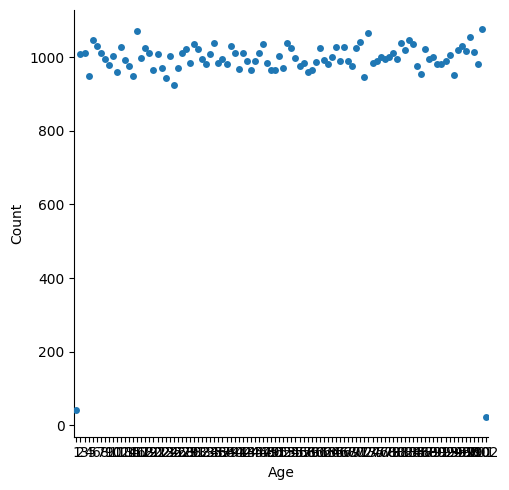

In [5]:
plt.figure(figsize=(10, 10))
df['date_of_birth'] = pd.to_datetime(df['date_of_birth'])
current_date = pd.to_datetime('now')
df['Age'] = (current_date - df['date_of_birth']).dt.days // 365
patient_count = df['Age'].value_counts().reset_index()
patient_count.columns = ['Age', 'Count']
patient_count = patient_count.sort_values(by='Age')
sns.catplot(x='Age', y='Count', data=patient_count)
print(patient_count['Count'])
plt.show()

### EDA 3
Count the number of appointments every year

C:\Users\russel\AppData\Local\Temp\ipykernel_20008\2139692776.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['last_appointment_date'] = pd.to_datetime(df['last_appointment_date'])


   year  count
1  2021  38257
0  2022  49913
2  2023  11830


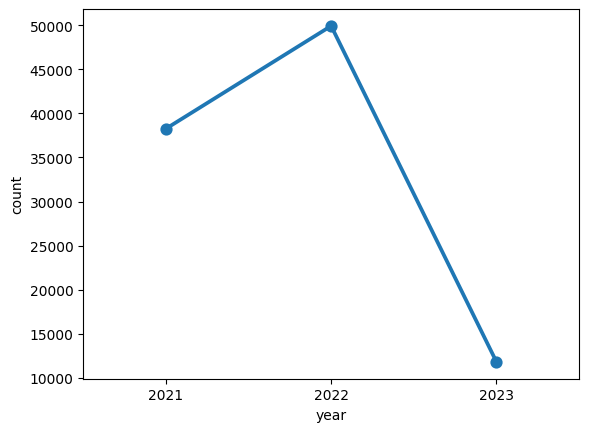

In [19]:
df['last_appointment_date'] = pd.to_datetime(df['last_appointment_date'])
df['year'] = df['last_appointment_date'].dt.year
appointment_count = df['year'].value_counts().reset_index()
appointment_count.columns = ['year', 'count']
appointment_count = appointment_count.sort_values(by='year')
sns.pointplot(x='year', y='count', data=appointment_count)
print(appointment_count)
plt.show()

### EDA 4
Counting the distinct allergies in each index

[971, 971, 971]


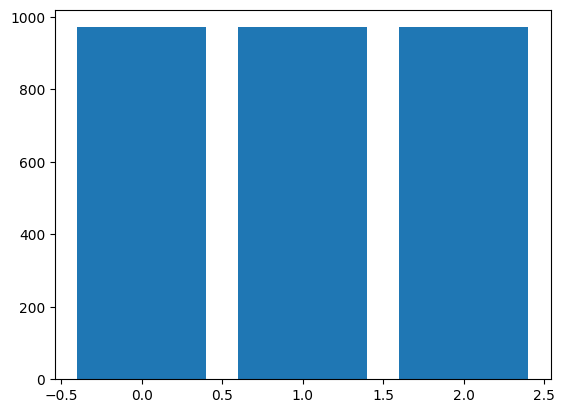

In [6]:
allergy_array = [value.split(',') for value in df['allergies']]
distinct_counts = [len(set(col)) for col in zip(*allergy_array)]
plt.bar(range(len(distinct_counts)), distinct_counts)
print(distinct_counts)
plt.show()

### EDA 5
Counting the distinct medical conditions in each index

[971, 971, 971]


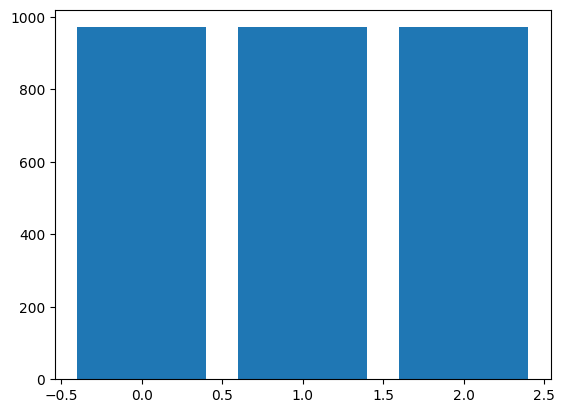

In [7]:
condition_array = [value.split(',') for value in df['medical_conditions']]
distinct_counts = [len(set(col)) for col in zip(*condition_array)]
plt.bar(range(len(distinct_counts)), distinct_counts)
print(distinct_counts)
plt.show()

### EDA 6
Counting the distinct medications in each index

[971, 971, 971]


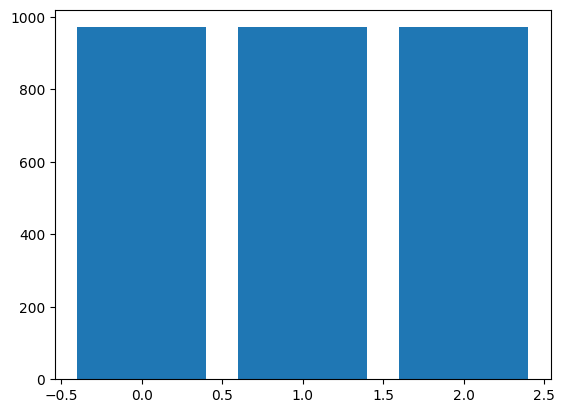

In [8]:
medication_array = [value.split(',') for value in df['medications']]
distinct_counts = [len(set(col)) for col in zip(*medication_array)]
plt.bar(range(len(distinct_counts)), distinct_counts)
print(distinct_counts)
plt.show()

### EDA 7
Calculating the Mean Age of Male and Female

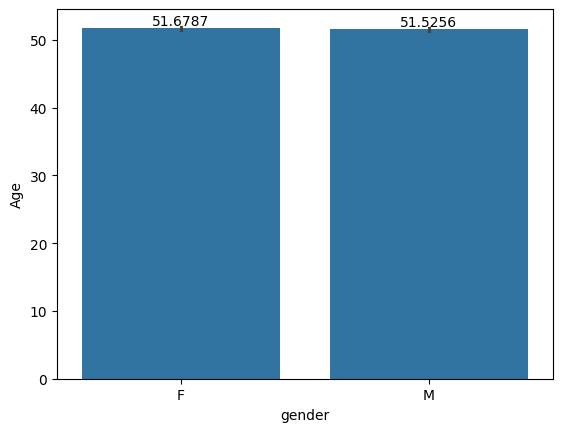

In [9]:
ax = sns.barplot(x=df['gender'], y= df['Age'], data=df, estimator=np.mean)
for bars in ax.containers:
    ax.bar_label(bars)


### EDA 8
Calculating the busiest appointment day 

    last_appointment_date  Count
730            22-08-2021    100
729            01-05-2021    102
727            21-04-2022    105
728            08-08-2021    105
726            03-04-2021    106
..                    ...    ...
4              28-03-2021    168
3              23-06-2021    170
2              20-04-2021    170
1              30-05-2021    173
0              22-07-2022    180

[731 rows x 2 columns]


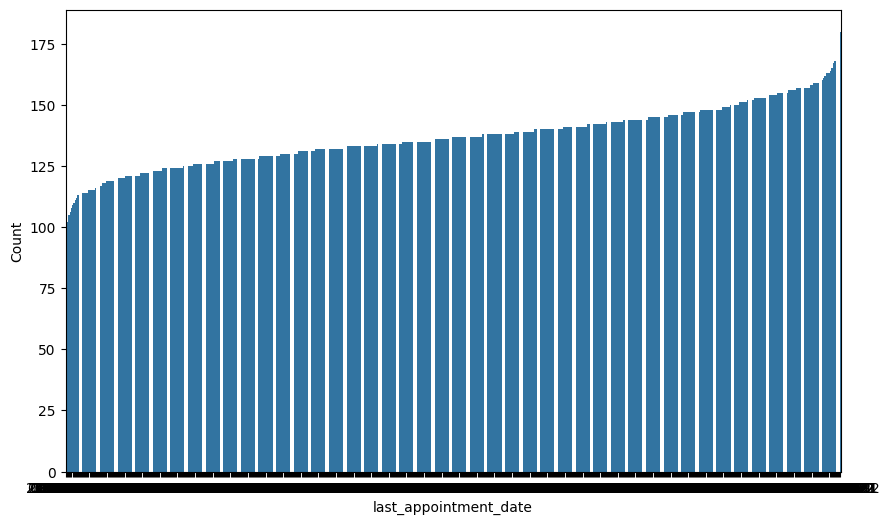

In [10]:
date_counts = df['last_appointment_date'].value_counts().reset_index()
date_counts.columns = ['last_appointment_date', 'Count']
date_counts = date_counts.sort_values(by= 'Count')
plt.figure(figsize=(10, 6))
sns.barplot(x='last_appointment_date', y='Count', data=date_counts)
print(date_counts)
plt.show()

### EDA 9
Calculating the number of children, adults and senior citizens

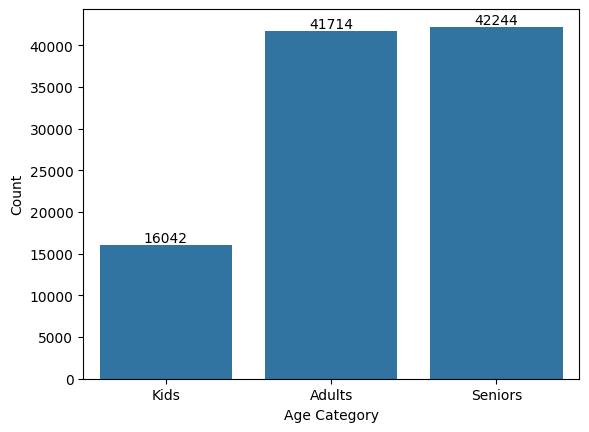

In [11]:
age_bins = [0, 18, 60, float('inf')]  
age_labels = ['Kids', 'Adults', 'Seniors']
df['Age Category'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)
age_category_counts = df['Age Category'].value_counts().reset_index()
age_category_counts.columns = ['Age Category', 'Count']
ax = sns.barplot(x='Age Category', y= 'Count', data=age_category_counts)
for bars in ax.containers:
    ax.bar_label(bars)

### EDA 10
Outliers in the Last Appointment Date column

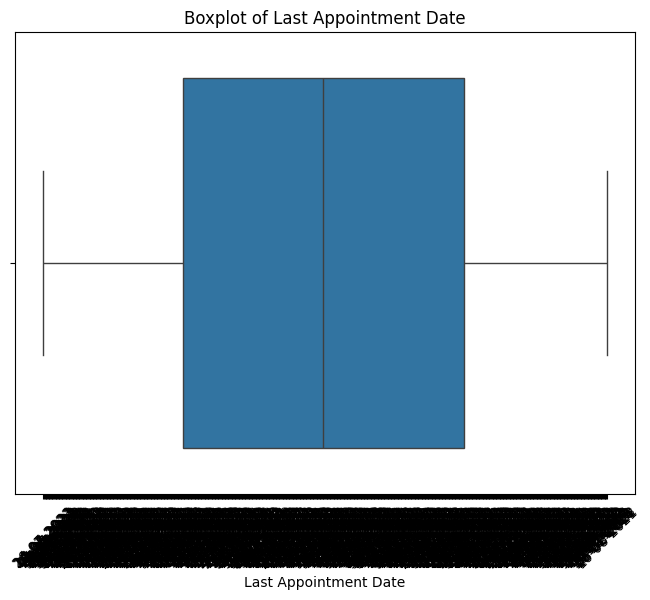

In [12]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['last_appointment_date'])
plt.title('Boxplot of Last Appointment Date')
plt.xlabel('Last Appointment Date')
plt.xticks(rotation=45)
plt.show()

### EDA 11
Distribution of ages among male and female patients

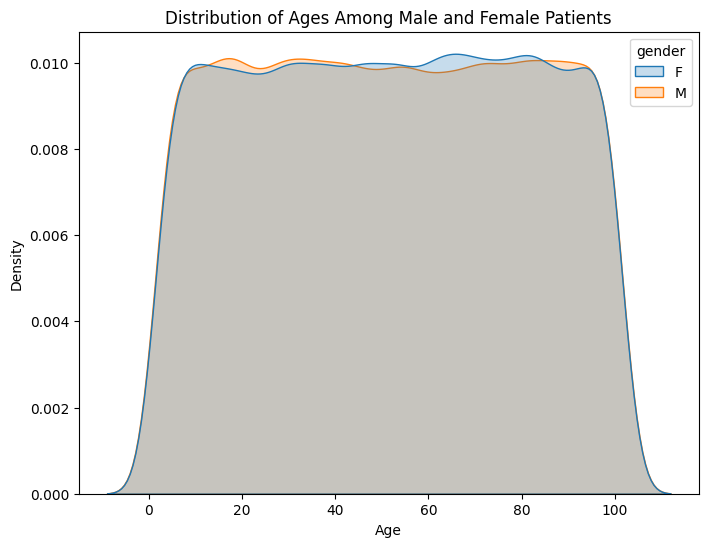

In [13]:
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df, x='Age', hue='gender', fill=True, common_norm=False)
plt.title('Distribution of Ages Among Male and Female Patients')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

### EDA 12
Outliers in the age column

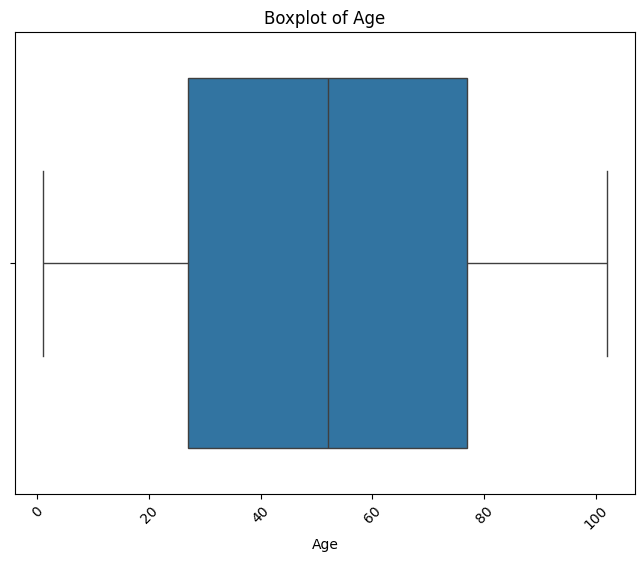

In [14]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Age'])
plt.title('Boxplot of Age')
plt.xlabel('Age')
plt.xticks(rotation=45)
plt.show()

### EDA 13
Monthly trends in appointment frequency

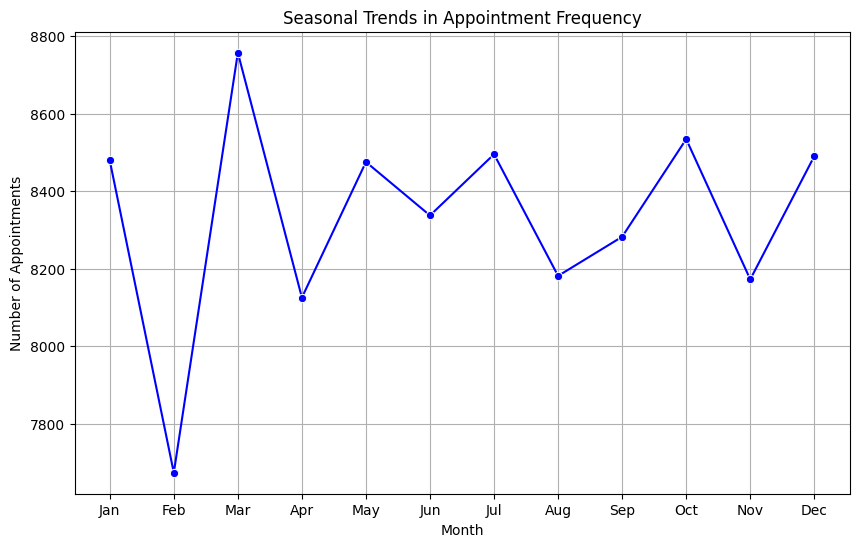

In [20]:
df['Month'] = df['last_appointment_date'].dt.month
monthly_appointments = df['Month'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_appointments, marker='o', color='b')
plt.title('Seasonal Trends in Appointment Frequency')
plt.xlabel('Month')
plt.ylabel('Number of Appointments')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

### EDA 14
Number of Patients with the same name

In [21]:
name_counts = df['name'].value_counts()
num_unique_names = len(name_counts)
print("Number of patients with the same name:")
print(name_counts)
print("\nNumber of unique names:", num_unique_names)

Number of patients with the same name:
name
Michael Smith      48
David Smith        42
John Smith         37
Michael Johnson    37
Jennifer Smith     33
                   ..
Brad Knight         1
Shelby Ware         1
Mr. Eric Smith      1
Jesse Page          1
Benjamin Lowery     1
Name: count, Length: 71073, dtype: int64

Number of unique names: 71073


### EDA 15
The most common medical condition, medication and allergies

In [23]:
df['Combined'] = df['medical_conditions'] + ',' + df['medications'] + ',' + df['allergies']

# Calculate the mode (most common combination) of the 'Combined' column
most_common_combination = df['Combined'].mode().iloc[0]

print("Most common combination of medical conditions, medications, and allergies:\n", most_common_combination)

Most common combination of medical conditions, medications, and allergies:
 American, agree, remember,hundred, future, since,until, science, be


## Machine Learning Algorithm
### 1. Decision Tree

In [8]:
from sklearn.preprocessing import LabelEncoder
small_df = df.sample(n=1000, random_state=42)
targets = df.sample(n=1000, random_state=42)
le_conditions = LabelEncoder()
le_allergies = LabelEncoder()
le_medications = LabelEncoder()
small_df['conditions_n'] = le_conditions.fit_transform(small_df['medical_conditions'])
small_df['allergies_n'] = le_allergies.fit_transform(small_df['allergies'])
targets['medications_n'] = le_medications.fit_transform(small_df['medications'])
small_dfs = small_df.drop(['patient_id', 'name', 'date_of_birth', 'last_appointment_date', 'gender','medical_conditions','allergies','medications'], axis='columns')
target = targets.drop(['patient_id', 'name', 'date_of_birth', 'last_appointment_date', 'gender','medical_conditions','allergies','medications'], axis='columns')
small_dfs.head()


,conditions_n,allergies_n
75721,894,342
80184,713,614
19864,784,466
76699,796,727
92991,951,33


In [9]:
small_df.head()

,patient_id,name,date_of_birth,gender,medical_conditions,medications,allergies,last_appointment_date,conditions_n,allergies_n
75721,75722,Cynthia Chang,19-10-2001,M,"thing, with, present","white, girl, behavior","fly, series, under",15-04-2022,894,342
80184,80185,Jessica Drake,06-08-1980,M,"ready, rich, writer","recent, least, inside","painting, Mr, it",05-04-2022,713,614
19864,19865,Maria Stewart,04-07-1976,M,"short, answer, different","land, voice, degree","land, form, pick",24-10-2021,784,466
76699,76700,Kenneth Cooper,23-10-1990,F,"sit, idea, form","report, option, since","right, worry, black",11-05-2022,796,727
92991,92992,Kathryn Sherman,24-03-1994,F,"watch, space, road","wall, once, card","agent, worker, lose",02-01-2022,951,33


In [10]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(small_dfs, target)

DecisionTreeClassifier()

In [11]:
string1 = input("Enter 3 medical conditions : ")
string2 = input("Enter 3 allergies : ")

combined_strings = [string1, string2]
encoder = LabelEncoder()
encoder.fit(combined_strings)

# Transform the input strings
x1 = encoder.transform([string1])[0]
x2 = encoder.transform([string2])[0]
for index, i in small_df.iterrows():
    if i['medical_conditions'] == string1:
        x1 = i['conditions_n']
        break
for index, i in small_df.iterrows():
    if i['allergies'] == string2:
        x2 = i['allergies_n']
        break

print(x1,x2)

1 0


In [12]:
model.score(small_dfs, target)
x = model.predict([[x1,x2]])
for index, row in targets.iterrows():
    # Check if the value in the 'medication_n' column is equal to x
    if row['medications_n'] == x:
        # If the condition is true, print the value in the 'medication' column
        print(row['medications'])


suffer, those, create


c:\Users\russel\Desktop\Assignments and Projects\CapStone Project Health Tracker\.env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


## Machine Learning Algorithm
### 2.Random Forest

In [34]:
cd = df.sample(n= 1000, random_state= 42)
dd = df.sample(n =1000, random_state= 42)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
cd['medical_conditions_encoded'] = encoder.fit_transform(cd['medical_conditions'])
cd['allergies_encoded'] = encoder.fit_transform(cd['allergies'])
cd['medications_encoded'] = encoder.fit_transform(cd['medications'])

In [68]:
ss= cd.drop(['patient_id', 'name', 'date_of_birth', 'gender','medical_conditions','allergies', 'last_appointment_date','medications'], axis= 1)

In [69]:
x = ss.drop('medications_encoded', axis= 1)
y = cd['medications_encoded']
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size= 0.4, random_state= 42)

In [70]:
reg = RandomForestRegressor(n_estimators= 500, random_state= 42)
reg.fit(xTrain, yTrain)

RandomForestRegressor(n_estimators=500, random_state=42)

In [73]:
string1 = input("Enter 3 medical conditions : ")
string2 = input("Enter 3 allergies : ")

combined_strings = [string1, string2]
encoder = LabelEncoder()
encoder.fit(combined_strings)

# Transform the input strings
x1 = encoder.transform([string1])[0]
x2 = encoder.transform([string2])[0]

for index, i in cd.iterrows():
    if i['medical_conditions'] == string1:
        x1 = i['conditions_n']
        break
for index, i in cd.iterrows():
    if i['allergies'] == string2:
        x2 = i['allergies_n']
        break

In [ ]:
ans = reg.predict([[x1,x2]])
print(x1, x2, ans)
rounded_values = np.round(ans)
for index, row in targets.iterrows():
    # Check if the value in the 'medication_n' column is equal to x
    if row['medications_n'] == rounded_values:
        # If the condition is true, print the value in the 'medication' column
        print(row['medications'])